In [1]:
import numpy as np
import pandas as pd
from generator.make_instance import make_dataset

df = make_dataset(customer_count = 100)

In [2]:
from generator.distance_matrix import distance_function

distance = distance_function(df[['latitude', 'longitude']].values, is_coord = True)

C:\Users\sbabin\Desktop\VRP\generator\distance_matrix.py:34: RuntimeWarning: invalid value encountered in arccos
  arc = np.arccos(angle)


In [3]:
from scipy.spatial.distance import pdist, squareform
import random 
customer_count = 100
dist_matrix =pd.DataFrame(distance)
dist_matrix.iloc[range(customer_count), range(customer_count)] = np.inf

In [10]:
from heurictics.greedy import greedy_heurictics

greedy_results = greedy_heurictics(df, dist_matrix, dim = 100, cap = 300, k_nei = 5, iters = 1000)

In [5]:
from heurictics.op_tools import *

op_results = main(df, distance, cars = 5, cap = 300)

Расстояние в тотале: 55.58 km
Максимальное расстояние: 18.36 km
Машин задействовано: 5


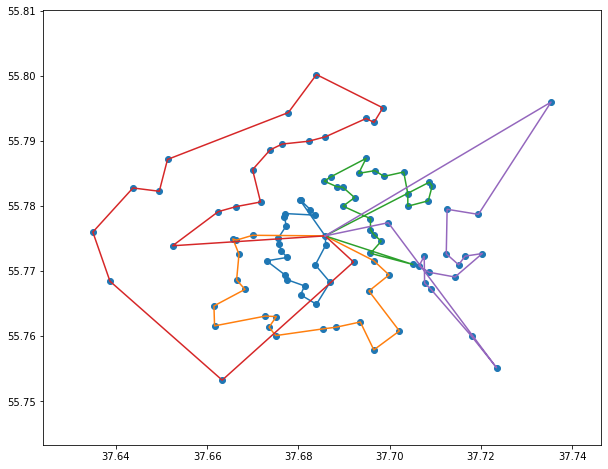

In [12]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
data = df[['latitude', 'longitude']].values
plt.scatter(data[:, 1], data[:, 0])
for i in greedy_results['paths'].values():
    plt.plot(data[i, 1], data[i, 0])
print('Расстояние в тотале:', np.round(greedy_results['total_dist'], 2), 'km')
print('Максимальное расстояние:', np.round(max(list(greedy_results['vehicles_dist'].values())), 2), 'km')
print('Машин задействовано:', int(len(greedy_results['vehicles_dist'].keys())))
plt.show()

Расстояние в тотале: 48521 m
Максимальное расстояние: 13312 m
Машин задействовано: 5


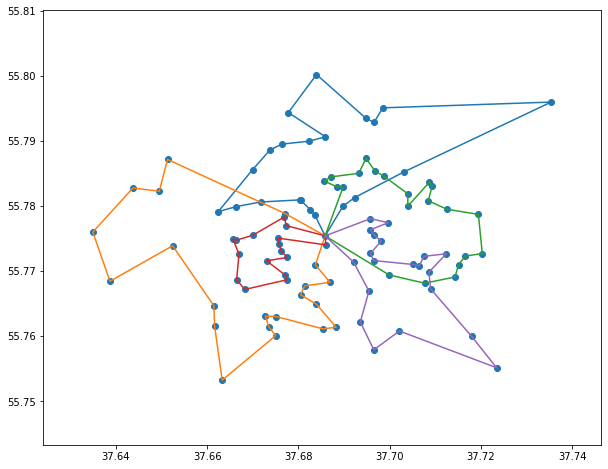

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
data = df[['latitude', 'longitude']].values
plt.scatter(data[:, 1], data[:, 0])
for i in op_results['paths'].values():
    plt.plot(data[i, 1], data[i, 0])
print('Расстояние в тотале:', np.round(op_results['total_dist'], 2), 'm')
print('Максимальное расстояние:', np.round(max(list(op_results['vehicles_dist'].values())), 2), 'm')
print('Машин задействовано:', int(len(op_results['vehicles_dist'].keys())))
plt.show()